In [67]:
import pandas as pd
import numpy as np
import tensorflow as tf
import urllib3
import json
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

### Get the data

In [2]:
http = urllib3.PoolManager()

In [3]:
r = http.request('GET', 'https://fcsapi.com/api/forex/history?symbol=EUR/USD&period=1h&from=2019-05-01T12:00&to=2019-11-02T12:00&access_key=T779qtAIjtYNTWkzKsPJDnhlm0C5JMp1dXhKTqYb6UBdA2kcOG')

C:\Users\hero144\.conda\envs\py36\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [6]:
data = json.loads(r.data)

In [7]:
data

{'status': True,
 'msg': 'successfully',
 'response': [{'o': '1.10525',
   'h': '1.1056',
   'l': '1.10415',
   'c': '1.10515',
   'v': '5549',
   't': 1571234400,
   'tm': '2019-10-16 14:00:00'},
  {'o': '1.10515',
   'h': '1.10775',
   'l': '1.10445',
   'c': '1.1077',
   'v': '5288',
   't': 1571238000,
   'tm': '2019-10-16 15:00:00'},
  {'o': '1.1075',
   'h': '1.10855',
   'l': '1.1073',
   'c': '1.1081',
   'v': '3602',
   't': 1571241600,
   'tm': '2019-10-16 16:00:00'},
  {'o': '1.1081',
   'h': '1.1081',
   'l': '1.10655',
   'c': '1.107',
   'v': '2905',
   't': 1571245200,
   'tm': '2019-10-16 17:00:00'},
  {'o': '1.10695',
   'h': '1.10755',
   'l': '1.1068',
   'c': '1.1072',
   'v': '2483',
   't': 1571248800,
   'tm': '2019-10-16 18:00:00'},
  {'o': '1.1074',
   'h': '1.1077',
   'l': '1.10715',
   'c': '1.10755',
   'v': '2113',
   't': 1571252400,
   'tm': '2019-10-16 19:00:00'},
  {'o': '1.10745',
   'h': '1.10755',
   'l': '1.1071',
   'c': '1.1072',
   'v': '1559',


In [136]:
df = pd.DataFrame(data['response'])    

In [137]:
df.head()

,c,h,l,o,t,tm,v
0,1.10515,1.1056,1.10415,1.10525,1571234400,2019-10-16 14:00:00,5549
1,1.1077,1.10775,1.10445,1.10515,1571238000,2019-10-16 15:00:00,5288
2,1.1081,1.10855,1.1073,1.1075,1571241600,2019-10-16 16:00:00,3602
3,1.107,1.1081,1.10655,1.1081,1571245200,2019-10-16 17:00:00,2905
4,1.1072,1.10755,1.1068,1.10695,1571248800,2019-10-16 18:00:00,2483


In [138]:
df = df[['tm','c']]

In [139]:
len(df)

300

### Create date and time from timestamp

In [140]:
df.tm = df.tm.apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [141]:
df['date'] = [d.date() for d in df['tm']]
df['time'] = [d.time() for d in df['tm']]

In [142]:
df.tail()

,tm,c,date,time
295,2019-11-01 16:00:00,1.1168,2019-11-01,16:00:00
296,2019-11-01 17:00:00,1.11615,2019-11-01,17:00:00
297,2019-11-01 18:00:00,1.1164,2019-11-01,18:00:00
298,2019-11-01 19:00:00,1.1169,2019-11-01,19:00:00
299,2019-11-01 20:00:00,1.1167,2019-11-01,20:00:00


In [156]:
df.date = pd.to_datetime(df.date, format="%Y-%m-%d")

In [164]:
df_tst = df.loc[df["date"] == "2019-11-01"]

In [165]:
df_tst

,tm,c,date,time
279,2019-11-01 00:00:00,1.1155,2019-11-01,00:00:00
280,2019-11-01 01:00:00,1.1166,2019-11-01,01:00:00
281,2019-11-01 02:00:00,1.1165,2019-11-01,02:00:00
282,2019-11-01 03:00:00,1.11645,2019-11-01,03:00:00
283,2019-11-01 04:00:00,1.1165,2019-11-01,04:00:00
284,2019-11-01 05:00:00,1.1164,2019-11-01,05:00:00
285,2019-11-01 06:00:00,1.11615,2019-11-01,06:00:00
286,2019-11-01 07:00:00,1.1163,2019-11-01,07:00:00
287,2019-11-01 08:00:00,1.11615,2019-11-01,08:00:00
288,2019-11-01 09:00:00,1.1149,2019-11-01,09:00:00


In [183]:
df['c'] = df['c'].astype('float')

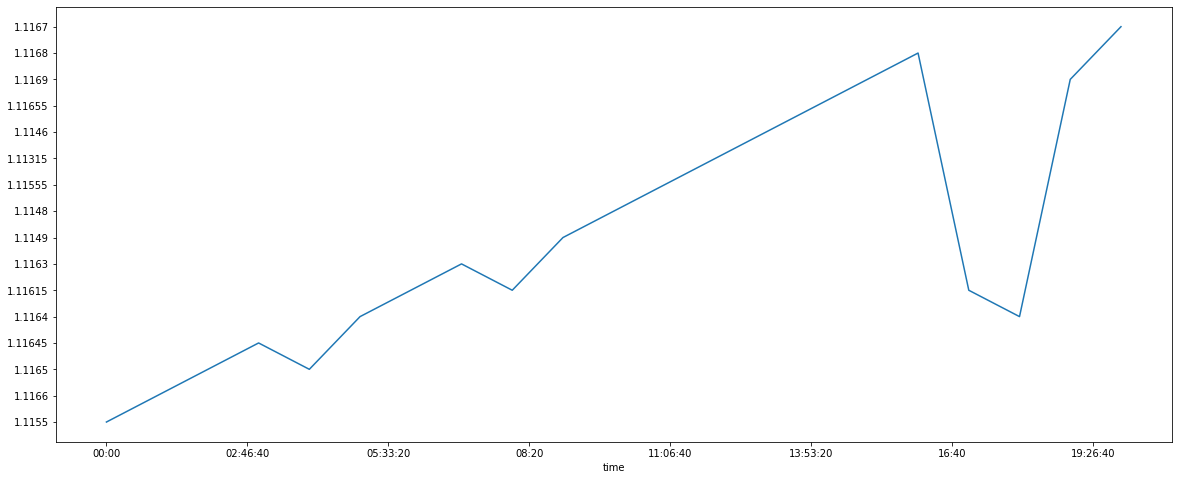

In [184]:
plt.figure(figsize=(20,8))
plt.plot(df_tst.time, df_tst.c)

In [185]:
df['time_'] = df.index

In [186]:
df.head()

,tm,c,date,time,time_
0,2019-10-16 14:00:00,1.10515,2019-10-16,14:00:00,0
1,2019-10-16 15:00:00,1.10770,2019-10-16,15:00:00,1
2,2019-10-16 16:00:00,1.10810,2019-10-16,16:00:00,2
3,2019-10-16 17:00:00,1.10700,2019-10-16,17:00:00,3
4,2019-10-16 18:00:00,1.10720,2019-10-16,18:00:00,4


In [187]:
series = df.c.to_numpy()

In [188]:
series

array([1.10515, 1.1077 , 1.1081 , 1.107  , 1.1072 , 1.10755, 1.1072 ,
       1.10735, 1.10755, 1.10745, 1.1083 , 1.108  , 1.1077 , 1.1078 ,
       1.1076 , 1.10715, 1.10665, 1.10775, 1.109  , 1.1118 , 1.1113 ,
       1.1116 , 1.11175, 1.1124 , 1.1116 , 1.1129 , 1.11265, 1.11265,
       1.1124 , 1.1125 , 1.1124 , 1.11275, 1.11255, 1.11245, 1.11285,
       1.1123 , 1.11235, 1.1128 , 1.11215, 1.112  , 1.1116 , 1.11245,
       1.11275, 1.113  , 1.11315, 1.1143 , 1.11475, 1.11405, 1.1139 ,
       1.1155 , 1.1158 , 1.1159 , 1.1161 , 1.1162 , 1.1171 , 1.11585,
       1.1155 , 1.11615, 1.11565, 1.1158 , 1.11555, 1.1162 , 1.11575,
       1.1156 , 1.11595, 1.11575, 1.1153 , 1.11575, 1.11645, 1.1166 ,
       1.11685, 1.11625, 1.11695, 1.11605, 1.1156 , 1.1146 , 1.1145 ,
       1.11515, 1.115  , 1.11465, 1.115  , 1.11495, 1.1154 , 1.11495,
       1.1152 , 1.11545, 1.1152 , 1.11515, 1.1149 , 1.1153 , 1.1154 ,
       1.1149 , 1.11445, 1.11415, 1.1144 , 1.11425, 1.1138 , 1.1127 ,
       1.1134 , 1.11

In [189]:
time = df.time_.to_numpy()

In [190]:
time


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [191]:
split_time = 250
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

In [192]:
len(time_valid), len(x_valid)

(50, 50)

In [193]:
window_size = 10
batch_size = 5
shuffle_buffer_size = 290

In [194]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [195]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [216]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

train_set = windowed_dataset(x_train, window_size, batch_size=5, shuffle_buffer=shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
  tf.keras.layers.SimpleRNN(30, return_sequences=True),
  tf.keras.layers.SimpleRNN(20),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 10.0)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=20, callbacks=[lr_schedule])

Epoch 1/20
48/48 [==============================] - 1s 21ms/step - loss: 2.4344 - mae: 2.9344
Epoch 2/20
48/48 [==============================] - 0s 5ms/step - loss: 2.3215 - mae: 2.8215
Epoch 3/20
48/48 [==============================] - 0s 5ms/step - loss: 2.1891 - mae: 2.6891
Epoch 4/20
48/48 [==============================] - 0s 5ms/step - loss: 2.0387 - mae: 2.5387
Epoch 5/20
48/48 [==============================] - 0s 5ms/step - loss: 1.8679 - mae: 2.3679
Epoch 6/20
48/48 [==============================] - 0s 5ms/step - loss: 1.6739 - mae: 2.1739
Epoch 7/20
48/48 [==============================] - 0s 5ms/step - loss: 1.4537 - mae: 1.9537
Epoch 8/20
48/48 [==============================] - 0s 6ms/step - loss: 1.2042 - mae: 1.7042
Epoch 9/20
48/48 [==============================] - 0s 5ms/step - loss: 0.9220 - mae: 1.4220
Epoch 10/20
48/48 [==============================] - 0s 5ms/step - loss: 0.6043 - mae: 1.1042
Epoch 11/20
48/48 [==============================] - 0s 6ms/step - l

[1e-08, 0.0001, 0, 30]

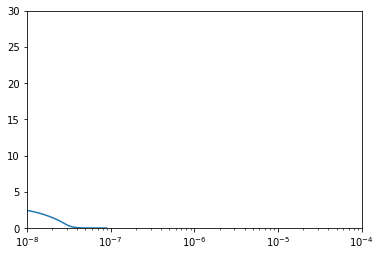

In [217]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 30])

In [218]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

dataset = windowed_dataset(x_train, window_size, batch_size=5, shuffle_buffer=shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
  tf.keras.layers.SimpleRNN(40, return_sequences=True),
  tf.keras.layers.SimpleRNN(20),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 10.0)
])

optimizer = tf.keras.optimizers.SGD(lr=5e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(dataset,epochs=35)

Epoch 1/35
48/48 [==============================] - 2s 32ms/step - loss: 6.8086 - mae: 7.3086
Epoch 2/35
48/48 [==============================] - 0s 6ms/step - loss: 6.4752 - mae: 6.9752
Epoch 3/35
48/48 [==============================] - 0s 6ms/step - loss: 6.1198 - mae: 6.6198
Epoch 4/35
48/48 [==============================] - 0s 5ms/step - loss: 5.7575 - mae: 6.2575
Epoch 5/35
48/48 [==============================] - ETA: 0s - loss: 5.4141 - mae: 5.914 - 0s 5ms/step - loss: 5.3912 - mae: 5.8912
Epoch 6/35
48/48 [==============================] - 0s 5ms/step - loss: 5.0238 - mae: 5.5238
Epoch 7/35
48/48 [==============================] - 0s 5ms/step - loss: 4.6578 - mae: 5.1578
Epoch 8/35
48/48 [==============================] - 0s 6ms/step - loss: 4.2955 - mae: 4.7955
Epoch 9/35
48/48 [==============================] - 0s 6ms/step - loss: 3.9389 - mae: 4.4389
Epoch 10/35
48/48 [==============================] - 0s 5ms/step - loss: 3.5896 - mae: 4.0896
Epoch 11/35
48/48 [===========

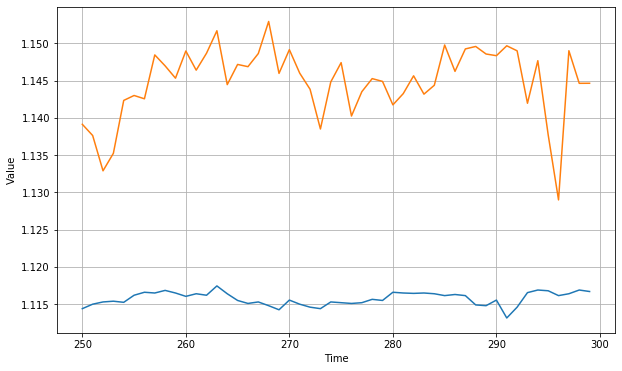

In [219]:
forecast=[]
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

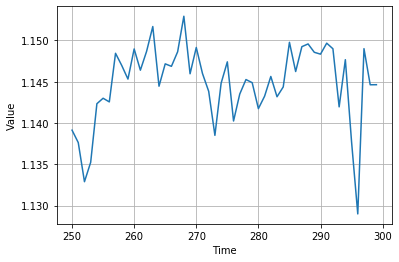

In [220]:

plot_series(time_valid, results)

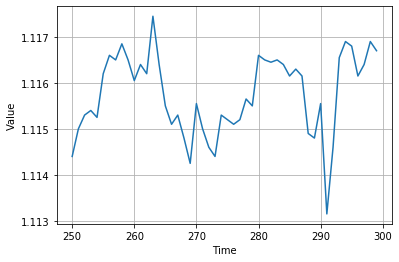

In [221]:
plot_series(time_valid, x_valid)

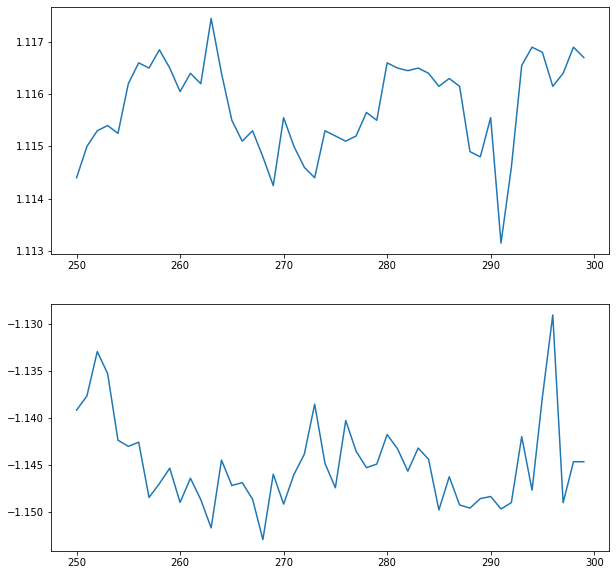

In [222]:

fig, axs = plt.subplots(2,figsize=(10,10))
axs[0].plot(time_valid, x_valid)
axs[1].plot(time_valid, -results)